In [ ]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization,Conv2D, GlobalAveragePooling1D

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
vocab_size = 19469
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 9600


In [ ]:
import pandas as pd
# colnames = ['name', 'Profile Link', 'Facebook ID', 'label', 'comment','time','Category','Gender','link','page name','post time','post content','comment react number']
data = pd.read_excel(r'without racism.xlsx', sheet_name='Sheet1')

In [ ]:
name = data['name'].values.tolist()
label = data['label'].values.tolist()
comment = data['comment'].values.tolist()
category = data['Category'].values.tolist()
gender = data['Gender'].values.tolist()
print(label[0])

sexual


In [ ]:
stopwords = [ "ржЕрждржПржм","ржЕржержЪ","ржЕржержмрж╛","ржЕржирзБржпрж╛ржпрж╝рзА","ржЕржирзЗржХ","ржЕржирзЗржХрзЗ","ржЕржирзЗржХрзЗржЗ","ржЕржирзНрждржд","ржЕржирзНржп","ржЕржмржзрж┐","ржЕржмрж╢рзНржп","ржЕрж░рзНржерж╛ржд","ржЖржЗ","ржЖржЧрж╛ржорзА","ржЖржЧрзЗ","ржЖржЧрзЗржЗ","ржЖржЫрзЗ","ржЖржЬ","ржЖржжрзНржпржнрж╛ржЧрзЗ","ржЖржкржирж╛рж░","ржЖржкржирж┐","ржЖржмрж╛рж░","ржЖржорж░рж╛","ржЖржорж╛ржХрзЗ","ржЖржорж╛ржжрзЗрж░","ржЖржорж╛рж░","ржЖржорж┐","ржЖрж░","ржЖрж░ржУ","ржЗ","ржЗрждрзНржпрж╛ржжрж┐","ржЗрж╣рж╛","ржЙржЪрж┐ржд","ржЙрждрзНрждрж░","ржЙржирж┐","ржЙржкрж░","ржЙржкрж░рзЗ","ржП","ржПржБржжрзЗрж░","ржПржБрж░рж╛","ржПржЗ","ржПржХржЗ","ржПржХржЯрж┐","ржПржХржмрж╛рж░","ржПржХрзЗ","ржПржХрзН","ржПржЦржи","ржПржЦржиржУ","ржПржЦрж╛ржирзЗ","ржПржЦрж╛ржирзЗржЗ","ржПржЯрж╛","ржПржЯрж╛ржЗ","ржПржЯрж┐","ржПржд","ржПрждржЯрж╛ржЗ","ржПрждрзЗ","ржПржжрзЗрж░","ржПржм","ржПржмржВ","ржПржмрж╛рж░","ржПржоржи","ржПржоржиржХрзА","ржПржоржирж┐","ржПрж░","ржПрж░рж╛","ржПрж▓","ржПрж╕","ржПрж╕рзЗ","ржР","ржУ","ржУржБржжрзЗрж░","ржУржБрж░","ржУржБрж░рж╛","ржУржЗ","ржУржХрзЗ","ржУржЦрж╛ржирзЗ","ржУржжрзЗрж░","ржУрж░","ржУрж░рж╛","ржХржЦржиржУ","ржХржд","ржХржмрзЗ","ржХржоржирзЗ","ржХржпрж╝рзЗржХ","ржХржпрж╝рзЗржХржЯрж┐","ржХрж░ржЫрзЗ","ржХрж░ржЫрзЗржи","ржХрж░рждрзЗ","ржХрж░ржмрзЗ","ржХрж░ржмрзЗржи","ржХрж░рж▓рзЗ","ржХрж░рж▓рзЗржи","ржХрж░рж╛","ржХрж░рж╛ржЗ","ржХрж░рж╛ржпрж╝","ржХрж░рж╛рж░","ржХрж░рж┐","ржХрж░рж┐рждрзЗ","ржХрж░рж┐ржпрж╝рж╛","ржХрж░рж┐ржпрж╝рзЗ","ржХрж░рзЗ","ржХрж░рзЗржЗ","ржХрж░рзЗржЫрж┐рж▓рзЗржи","ржХрж░рзЗржЫрзЗ","ржХрж░рзЗржЫрзЗржи","ржХрж░рзЗржи","ржХрж╛ржЙржХрзЗ","ржХрж╛ржЫ","ржХрж╛ржЫрзЗ","ржХрж╛ржЬ","ржХрж╛ржЬрзЗ","ржХрж╛рж░ржУ","ржХрж╛рж░ржг","ржХрж┐","ржХрж┐ржВржмрж╛","ржХрж┐ржЫрзБ","ржХрж┐ржЫрзБржЗ","ржХрж┐ржирзНрждрзБ","ржХрзА","ржХрзЗ","ржХрзЗржЙ","ржХрзЗржЙржЗ","ржХрзЗржЦрж╛","ржХрзЗржи","ржХрзЛржЯрж┐","ржХрзЛржи","ржХрзЛржиржУ","ржХрзЛржирзЛ","ржХрзНрж╖рзЗрждрзНрж░рзЗ","ржХрзЯрзЗржХ","ржЦрзБржм","ржЧрж┐ржпрж╝рзЗ","ржЧрж┐ржпрж╝рзЗржЫрзЗ","ржЧрж┐рзЯрзЗ","ржЧрзБрж▓рж┐","ржЧрзЗржЫрзЗ","ржЧрзЗрж▓","ржЧрзЗрж▓рзЗ","ржЧрзЛржЯрж╛","ржЪрж▓рзЗ","ржЪрж╛ржи","ржЪрж╛ржпрж╝","ржЪрж╛рж░","ржЪрж╛рж▓рзБ","ржЪрзЗржпрж╝рзЗ","ржЪрзЗрж╖рзНржЯрж╛","ржЫрж╛ржбрж╝рж╛","ржЫрж╛ржбрж╝рж╛ржУ","ржЫрж┐рж▓","ржЫрж┐рж▓рзЗржи","ржЬржи","ржЬржиржХрзЗ","ржЬржирзЗрж░","ржЬржирзНржп","ржЬржирзНржпржУржЬрзЗ","ржЬрж╛ржирждрзЗ","ржЬрж╛ржирж╛","ржЬрж╛ржирж╛ржирзЛ","ржЬрж╛ржирж╛ржпрж╝","ржЬрж╛ржирж┐ржпрж╝рзЗ","ржЬрж╛ржирж┐ржпрж╝рзЗржЫрзЗ","ржЬрзЗ","ржЬрзНржиржЬржи","ржЯрж┐","ржарж┐ржХ","рждржЦржи","рждржд","рждржерж╛","рждржмрзБ","рждржмрзЗ","рждрж╛","рждрж╛ржБржХрзЗ","рждрж╛ржБржжрзЗрж░","рждрж╛ржБрж░","рждрж╛ржБрж░рж╛","рждрж╛ржБрж╛рж╣рж╛рж░рж╛","рждрж╛ржЗ","рждрж╛ржУ","рждрж╛ржХрзЗ","рждрж╛рждрзЗ","рждрж╛ржжрзЗрж░","рждрж╛рж░","рждрж╛рж░ржкрж░","рждрж╛рж░рж╛","рждрж╛рж░рзИ","рждрж╛рж╣рж▓рзЗ","рждрж╛рж╣рж╛","рждрж╛рж╣рж╛рждрзЗ","рждрж╛рж╣рж╛рж░","рждрж┐ржиржР","рждрж┐ржирж┐","рждрж┐ржирж┐ржУ","рждрзБржорж┐","рждрзБрж▓рзЗ","рждрзЗржоржи","рждрзЛ","рждрзЛржорж╛рж░","ржерж╛ржХржмрзЗ","ржерж╛ржХржмрзЗржи","ржерж╛ржХрж╛","ржерж╛ржХрж╛ржпрж╝","ржерж╛ржХрзЗ","ржерж╛ржХрзЗржи","ржерзЗржХрзЗ","ржерзЗржХрзЗржЗ","ржерзЗржХрзЗржУ","ржжрж┐ржХрзЗ","ржжрж┐рждрзЗ","ржжрж┐ржи","ржжрж┐ржпрж╝рзЗ","ржжрж┐ржпрж╝рзЗржЫрзЗ","ржжрж┐ржпрж╝рзЗржЫрзЗржи","ржжрж┐рж▓рзЗржи","ржжрзБ","ржжрзБржЗ","ржжрзБржЯрж┐","ржжрзБржЯрзЛ","ржжрзЗржУржпрж╝рж╛","ржжрзЗржУржпрж╝рж╛рж░","ржжрзЗржУрзЯрж╛","ржжрзЗржЦрждрзЗ","ржжрзЗржЦрж╛","ржжрзЗржЦрзЗ","ржжрзЗржи","ржжрзЗржпрж╝","ржжрзНржмрж╛рж░рж╛","ржзрж░рж╛","ржзрж░рзЗ","ржзрж╛ржорж╛рж░","ржирждрзБржи","ржиржпрж╝","ржирж╛","ржирж╛ржЗ","ржирж╛ржХрж┐","ржирж╛ржЧрж╛ржж","ржирж╛ржирж╛","ржирж┐ржЬрзЗ","ржирж┐ржЬрзЗржЗ","ржирж┐ржЬрзЗржжрзЗрж░","ржирж┐ржЬрзЗрж░","ржирж┐рждрзЗ","ржирж┐ржпрж╝рзЗ","ржирж┐рзЯрзЗ","ржирзЗржЗ","ржирзЗржУржпрж╝рж╛","ржирзЗржУржпрж╝рж╛рж░","ржирзЗржУрзЯрж╛","ржирзЯ","ржкржХрзНрж╖рзЗ","ржкрж░","ржкрж░рзЗ","ржкрж░рзЗржЗ","ржкрж░рзЗржУ","ржкрж░рзНржпржирзНржд","ржкрж╛ржУржпрж╝рж╛","ржкрж╛ржЪ","ржкрж╛рж░рж┐","ржкрж╛рж░рзЗ","ржкрж╛рж░рзЗржи","ржкрж┐","ржкрзЗржпрж╝рзЗ","ржкрзЗрзЯрзНрж░рзН","ржкрзНрж░рждрж┐","ржкрзНрж░ржержо","ржкрзНрж░ржнрзГрждрж┐","ржкрзНрж░ржпржирзНржд","ржкрзНрж░рж╛ржержорж┐ржХ","ржкрзНрж░рж╛ржпрж╝","ржкрзНрж░рж╛рзЯ","ржлрж▓рзЗ","ржлрж┐рж░рзЗ","ржлрзЗрж░","ржмржХрзНрждржмрзНржп","ржмржжрж▓рзЗ","ржмржи","ржмрж░ржВ","ржмрж▓рждрзЗ","ржмрж▓рж▓","ржмрж▓рж▓рзЗржи","ржмрж▓рж╛","ржмрж▓рзЗ","ржмрж▓рзЗржЫрзЗржи","ржмрж▓рзЗржи","ржмрж╕рзЗ","ржмрж╣рзБ","ржмрж╛","ржмрж╛ржжрзЗ","ржмрж╛рж░","ржмрж┐","ржмрж┐ржирж╛","ржмрж┐ржнрж┐ржирзНржи","ржмрж┐рж╢рзЗрж╖","ржмрж┐рж╖ржпрж╝ржЯрж┐","ржмрзЗрж╢","ржмрзЗрж╢рж┐","ржмрзНржпржмрж╣рж╛рж░","ржмрзНржпрж╛ржкрж╛рж░рзЗ","ржнрж╛ржмрзЗ","ржнрж╛ржмрзЗржЗ","ржорждрзЛ","ржорждрзЛржЗ","ржоржзрзНржпржнрж╛ржЧрзЗ","ржоржзрзНржпрзЗ","ржоржзрзНржпрзЗржЗ","ржоржзрзНржпрзЗржУ","ржоржирзЗ","ржорж╛рждрзНрж░","ржорж╛ржзрзНржпржорзЗ","ржорзЛржЯ","ржорзЛржЯрзЗржЗ","ржпржЦржи","ржпржд","ржпрждржЯрж╛","ржпржерзЗрж╖рзНржЯ","ржпржжрж┐","ржпржжрж┐ржУ","ржпрж╛","ржпрж╛ржБрж░","ржпрж╛ржБрж░рж╛","ржпрж╛ржУржпрж╝рж╛","ржпрж╛ржУржпрж╝рж╛рж░","ржпрж╛ржУрзЯрж╛","ржпрж╛ржХрзЗ","ржпрж╛ржЪрзНржЫрзЗ","ржпрж╛рждрзЗ","ржпрж╛ржжрзЗрж░","ржпрж╛ржи","ржпрж╛ржмрзЗ","ржпрж╛ржпрж╝","ржпрж╛рж░","ржпрж╛рж░рж╛","ржпрж┐ржирж┐","ржпрзЗ","ржпрзЗржЦрж╛ржирзЗ","ржпрзЗрждрзЗ","ржпрзЗржи","ржпрзЗржоржи","рж░","рж░ржХржо","рж░ржпрж╝рзЗржЫрзЗ","рж░рж╛ржЦрж╛","рж░рзЗржЦрзЗ","рж▓ржХрзНрж╖","рж╢рзБржзрзБ","рж╢рзБрж░рзБ","рж╕ржЩрзНржЧрзЗ","рж╕ржЩрзНржЧрзЗржУ","рж╕ржм","рж╕ржмрж╛рж░","рж╕ржорж╕рзНржд","рж╕ржорзНржкрзНрж░рждрж┐","рж╕рж╣","рж╕рж╣рж┐ржд","рж╕рж╛ржзрж╛рж░ржг","рж╕рж╛ржоржирзЗ","рж╕рж┐","рж╕рзБрждрж░рж╛ржВ","рж╕рзЗ","рж╕рзЗржЗ","рж╕рзЗржЦрж╛ржи","рж╕рзЗржЦрж╛ржирзЗ","рж╕рзЗржЯрж╛","рж╕рзЗржЯрж╛ржЗ","рж╕рзЗржЯрж╛ржУ","рж╕рзЗржЯрж┐","рж╕рзНржкрж╖рзНржЯ","рж╕рзНржмржпрж╝ржВ","рж╣ржЗрждрзЗ","рж╣ржЗржмрзЗ","рж╣ржЗржпрж╝рж╛","рж╣ржУржпрж╝рж╛","рж╣ржУржпрж╝рж╛ржпрж╝","рж╣ржУржпрж╝рж╛рж░","рж╣ржЪрзНржЫрзЗ","рж╣ржд","рж╣рждрзЗ","рж╣рждрзЗржЗ","рж╣ржи","рж╣ржмрзЗ","рж╣ржмрзЗржи","рж╣ржпрж╝","рж╣ржпрж╝рждрзЛ","рж╣ржпрж╝ржирж┐","рж╣ржпрж╝рзЗ","рж╣ржпрж╝рзЗржЗ","рж╣ржпрж╝рзЗржЫрж┐рж▓","рж╣ржпрж╝рзЗржЫрзЗ","рж╣ржпрж╝рзЗржЫрзЗржи","рж╣рж▓","рж╣рж▓рзЗ","рж╣рж▓рзЗржЗ","рж╣рж▓рзЗржУ","рж╣рж▓рзЛ","рж╣рж╛ржЬрж╛рж░","рж╣рж┐рж╕рж╛ржмрзЗ","рж╣рзИрж▓рзЗ","рж╣рзЛржХ","рж╣рзЯ" ]
for i in range(len(comment)):
  for word in stopwords:
    comment[i] = comment[i].replace(" "+word+" "," ")
    comment[i] = comment[i].replace("  "," ")

In [ ]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res)
# data = encode_and_bind(data, 'Gender')
# gender_female = data['Gender_Female'].values.tolist()
# gender_male = data['Gender_Male'].values.tolist()
# data = encode_and_bind(data, 'Category')
# category_actor = data['Category_Actor'].values.tolist()
# category_politician = data['Category_Politician'].values.tolist()
# category_singer = data['Category_Singer'].values.tolist()
# category_social = data['Category_Social'].values.tolist()
# category_sports = data['Category_Sports'].values.tolist()

In [ ]:
label2D = pd.get_dummies(data[['label']])
data = encode_and_bind(data, 'label')
label_not_bully = data['label_not bully'].values.tolist()
label_religious = data['label_religious'].values.tolist()
label_sexual = data['label_sexual'].values.tolist()
label_threat = data['label_threat'].values.tolist()
label_troll = data['label_troll'].values.tolist()

In [ ]:
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(comment)
word_index = tokenizer.word_index
print(word_index)
sequences = tokenizer.texts_to_sequences(comment)
padded = pad_sequences(sequences, padding='post')
print(padded.shape)

{'<OOV>': 1, 'ржирж╛рж╕рзНрждрж┐ржХ': 2, 'ржмрж┐рж╢рзНржмрж╛рж╕': 3, 'ржЖрж▓рзНрж▓рж╛рж╣': 4, 'рждрзБржЗ': 5, 'ржирж╛': 6, 'ржХржерж╛': 7, 'ржПржХржЯрж╛': 8, 'рждрзЛрж░': 9, 'рж╕рж╛ржлрж╛': 10, 'рж╣рж┐рж░рзЛ': 11, 'ржнрж╛ржЗ': 12, 'ржЖрж▓ржо': 13, 'ржнрж╛рж▓рзЛ': 14, 'ржХрзНрж╖ржорж╛': 15, 'ржорж╛ржирзБрж╖': 16, 'ржирж╛ред': 17, 'ржжрж┐рзЯрзЗ': 18, 'ржХржмрж┐рж░': 19, 'рж╣рзЯрзЗ': 20, 'ред': 21, 'ржЖрж▓рзНрж▓рж╛рж╣рж░': 22, 'ржорж╛ржЧрж┐': 23, 'ржнрзБрж▓': 24, 'ржЖржкржирж╛ржХрзЗ': 25, 'рж╕рж╛ржерзЗ': 26, 'ржоржд': 27, 'ржкрж░ржХрж╛рж▓': 28, 'рж╕рзБржирзНржжрж░': 29, 'ржПржЗ': 30, 'рж╕ржмрж╛ржЗ': 31, 'ржХржорзЗржирзНржЯ': 32, 'ржмрж╛ржмрж╛': 33, 'ржжрж╛ржи': 34, 'ржЦрж╛ржи': 35, 'ржЯрж╛': 36, 'ржПржХржЬржи': 37, 'ржирж╛ржЯржХ': 38, 'ржирж╛рж╕рзНрждрж┐ржХрзЗрж░': 39, 'ржПржХ': 40, 'ржпрж╛рзЯ': 41, 'ржмрж┐ржЪрж╛рж░': 42, 'ржорзБрж╕рж▓рж┐ржо': 43, 'ржмрж╛ржЪрзНржЪрж╛': 44, 'ржорж╛': 45, 'ржЧрж╛рж▓рж┐': 46, 'рждрж░': 47, 'ржирж╛ржЗ': 48, 'ржЖржорж┐': 49, 'ржмрзЬ': 50, 'рж╣рзЗржжрж╛рзЯрзЗрж

In [ ]:
# label2D = label2D.drop(['label_not bully'], axis=1)
# label2D = label2D.drop(['label_racism'], axis=1)
# label2D = label2D.drop(['label_religious'], axis=1)
# label2D = label2D.drop(['label_threat'], axis=1)
# label2D = label2D.drop(['label_troll'], axis=1)

# testing_labels = label2D[training_size:]
# training_labels = label2D[0:training_size]
print(len(label2D))

44001


In [ ]:
# training_sentences = comment[0:training_size]
# testing_sentences = comment[training_size:]
#training_label = label_troll[0:training_size]
#testing_label = label_troll[training_size:]
from sklearn.model_selection import train_test_split
X = comment
Y = label2D

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=15, test_size=0.15)

testing_labels = Y_test
training_labels = Y_train

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
Y_train

label_not bully  label_religious  ...  label_threat  label_troll
9696                 1                0  ...             0            0
35731                0                0  ...             0            1
24500                0                0  ...             0            0
9995                 0                0  ...             0            1
40550                1                0  ...             0            0
...                ...              ...  ...           ...          ...
35483                0                0  ...             0            0
39296                1                0  ...             0            0
2693                 0                0  ...             0            0
8076                 0                0  ...             0            1
7624                 1                0  ...             0            0

[37400 rows x 5 columns]

In [ ]:
X[12140]

'ржХрж▓рж┐ржЬрж╛рж░ ржнрж╛ржЗржЯрж┐'

In [ ]:
import numpy as np
training_padded = np.array(training_padded)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)
training_labels = np.array(training_labels)


In [ ]:
type(label2D)
#testing_labels = label2D[training_size:]
#training_labels = label2D[0:training_size]
print(testing_labels.shape)
print(training_labels.shape)
# training_labels[0].shape

print(label2D.shape)

(6601, 5)
(37400, 5)
(44001, 5)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.LSTM(100, dropout=0.2,return_sequences=True,  recurrent_dropout=0.2),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

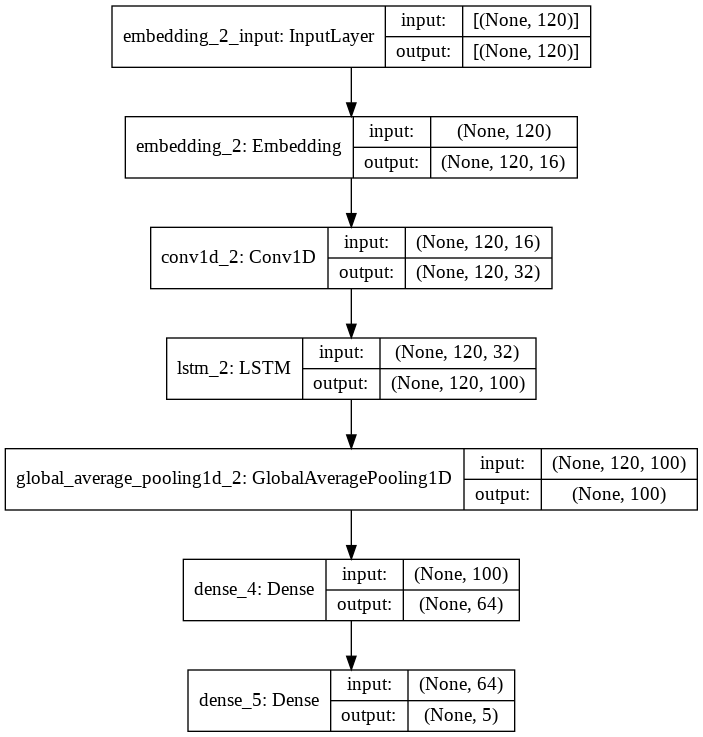

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, to_file='model2.png')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           311504    
_________________________________________________________________
conv1d (Conv1D)              (None, 120, 32)           1568      
_________________________________________________________________
lstm (LSTM)                  (None, 120, 100)          53200     
_________________________________________________________________
global_average_pooling1d (Gl (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                6464      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 325       
Total params: 373,061
Trainable params: 373,061
Non-trainable params: 0
__________________________________________________

In [ ]:
print(training_padded.shape)
print(training_labels.shape)
print(testing_padded.shape)
print(testing_labels.shape)
num_epochs = 15
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels),
                   callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15), #stop training if accuracy doesn't improve in next 3 epoch
        tf.keras.callbacks.ModelCheckpoint('model_best.hdf5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_frequency=1)
    ])

(37400, 120)
(37400, 5)
(6601, 120)
(6601, 5)
Epoch 1/15
1169/1169 [==============================] - 264s 224ms/step - loss: 1.3452 - accuracy: 0.4140 - val_loss: 0.9938 - val_accuracy: 0.6035

Epoch 00001: val_loss improved from inf to 0.99380, saving model to model_best.hdf5
Epoch 2/15
1169/1169 [==============================] - 263s 225ms/step - loss: 0.9272 - accuracy: 0.6421 - val_loss: 0.8589 - val_accuracy: 0.6767

Epoch 00002: val_loss improved from 0.99380 to 0.85889, saving model to model_best.hdf5
Epoch 3/15
1169/1169 [==============================] - 261s 223ms/step - loss: 0.7554 - accuracy: 0.7417 - val_loss: 0.7641 - val_accuracy: 0.7464

Epoch 00003: val_loss improved from 0.85889 to 0.76412, saving model to model_best.hdf5
Epoch 4/15
1169/1169 [==============================] - 261s 224ms/step - loss: 0.6751 - accuracy: 0.7811 - val_loss: 0.7000 - val_accuracy: 0.7626

Epoch 00004: val_loss improved from 0.76412 to 0.70001, saving model to model_best.hdf5
Epoch 5/15

In [ ]:
# from tensorflow import keras
# model = keras.models.load_model('model_best.hdf5')
print('commented')

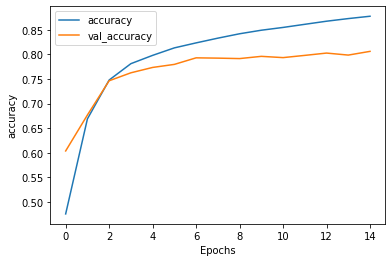

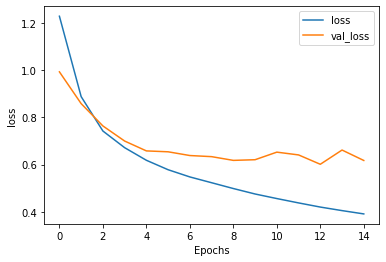

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
sentence = ['ржЪрзЗрж╣рж╛рж░рж╛ ржжрзЗржЦрж▓рзЗ ржмржорж┐ ржЖрж╕рзЗ']    
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

pred=model.predict(padded)[0]
print(pred)
# for z in range(len(pred)):
#     if pred[z]>0.5:
#         print(label2D.columns[z].replace('label_',""))
        
print('Not Bully : '+str(pred[0]))
print('Religious : '+str(pred[1]))
print('Sexual : '+str(pred[2]))
print('Troll : '+str(pred[4]))
print('Threat : '+str(pred[3])) 

[0.01749992 0.00223042 0.02800086 0.01309972 0.93916905]
Not Bully : 0.017499922
Religious : 0.0022304168
Sexual : 0.028000863
Troll : 0.93916905
Threat : 0.01309972


In [ ]:
# import os
# print(os.listdir('/content/drive/My Drive/Colab Notebooks/datasets/Bully/'))

# df = pd.read_excel(r'/content/drive/My Drive/Colab Notebooks/datasets/Bully/CopyOfMargedall.xlsx', sheet_name='Sheet1')

In [ ]:
# from tqdm import tqdm
# label=[]
# accuracy=[]
# for i in tqdm(range(len(df['comment']))):
#   notpred=True
#   sentence = [df['comment'][i]]
#   sequences = tokenizer.texts_to_sequences(sentence)
#   padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

#   pred=model.predict(padded)[0]
#   top=np.argsort(pred)[-1]
#   label.append(label2D.columns[top].replace('label_',""))
#   accuracy.append(pred[top])

In [ ]:
# print(len(label))

In [ ]:
# df.tail()

In [ ]:
# from pandas import ExcelWriter
# # df.insert(loc=4, column='label', value=label)
# # df.insert(loc=5, column='accuracy', value=accuracy)
# writer = ExcelWriter('/content/drive/My Drive/Colab Notebooks/datasets/Bully/MargedallWithLabel.xlsx')
# df.to_excel(writer,'Sheet1')
# writer.save()

In [ ]:
# sentence = ['ржЕржЗ ржмрзЗрж╢рзНржпрж╛рж░ ржХржерж╛ржЧрзБрж▓рзЛ рж╢рзБржирж▓рзЗржЗ ржмрзБржЭрж╛ ржпрж╛рзЯ ржХрж┐ ржЪржорзОржХрж╛рж░ ржбрж╛рзЯрж▓ржЧ рж╕рж╛ржЬрж┐рзЯрзЗржЫрзЗред ржкрж╢рзБрж░ ржмрж╛ржЪрзНржЪрж╛рж░рж╛редржХрж┐ржнрж╛ржмрзЗ рж╕ржВрж▓рж╛ржк ржЧрзБрж▓рзЛ ржмрж╛ржирж┐рзЯрзЗржЫрзЗред ржорж╣рж┐рж▓рж╛рж░ ржмрж╛рзЬрж┐рждрзЗ ржПржХржмрж╛рж░ ржЧрзЗржЫрж┐ ржЖрж░ ржХрзЛржирзЛ ржжрж┐ржи ржпрж╛ржмржирж╛ ржмрж┐рж╢рзНржмрж╛рж╕ ржХрж░ред... ржЕржнрж┐рж╢ржкрзНржд ржирж╛рж╕рзНрждрж┐ржХрж░рж╛ ржоржирзЗ ржХрж░рзЗ ржУржжрзЗрж░ ржЕржкржХрж░рзНржо ржорж╛ржирзБрж╖ ржмрзБржЭржмрзЗ ржирж╛ред ржорж╛ржирзБрж╖ ржХрж┐ ржУржжрзЗрж░ ржоржд ржмрж▓ржж ржЪрзЛржжрж╛ред ржЕржЗ ржмрзЗрж╢рзНржпрж╛ ржХржирзНржарзЗ ржХрждрж░ржХржо ржнрж╛ржмрзЗ ржбрж╛рзЯрж╛рж▓ржЧ ржжрж┐рзЯрзЗржЫрзЗ ржоржирзЗрж░ ржорж╛ржзрзБрж░рзА ржорж┐рж╢рж┐ржпрж╝рзЗ ржЖрж░ ржорж╛ржУрж▓рж╛ржирж╛ рж╕рж╛ржИржжрзАрж░ ржХржирзНржа ржбрж╛ржмрж┐ржВ ржХрж░рзЗ ржЬрзБрзЬрзЗ ржжрж┐рзЯрзЗржЫрзЗред ржХрзЯржжрж┐ржи ржХрж░ржмрзЗ ржПрж╕ржм? рж╢рзЗрж╖ рж░ржХрзНрж╖рж╛ рж╣ржмрзЗ рждрзЛ?']
# sequences = tokenizer.texts_to_sequences(sentence)
# padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# pred=model.predict(padded)[0]
# top=np.argsort(pred)[-1]
# print(label2D.columns[top].replace('label_',""))
# print(pred)

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[2]))
print(X_train[2])
print(reverse_word_index[1])

ржкрзЗржЬ ржЯрж╛ рждрзЗ ржлрж▓рзЛрзЯрж╛рж░ ржмрж╛рзЬрж╛ржЗрждрзЗ ржЖрж╕ржЪрзЗ ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
ржкрзЗржЬ ржЯрж╛ рждрзЗ ржлрж▓рзЛрзЯрж╛рж░ ржмрж╛рзЬрж╛ржЗрждрзЗ ржЖрж╕ржЪрзЗ
<OOV>


In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(19469, 16)


In [ ]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, 19468 ):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


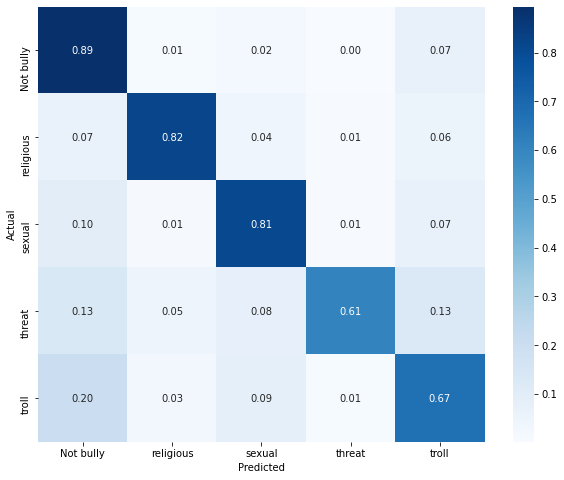

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
rounded_predictions = model.predict_classes(testing_padded, verbose=0)
rounded_labels=np.argmax(testing_labels, axis=1)
# print(testing_labels)
cm = confusion_matrix(y_true=rounded_labels, y_pred=rounded_predictions)
cm_plot_labels = ['Not bully', 'religious','sexual','threat','troll']
#plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=cm_plot_labels, yticklabels=cm_plot_labels, cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

5 class model report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(rounded_labels,rounded_predictions))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84      2357
           1       0.90      0.82      0.86      1084
           2       0.81      0.81      0.81      1389
           3       0.81      0.61      0.70       252
           4       0.74      0.67      0.70      1519

    accuracy                           0.80      6601
   macro avg       0.81      0.76      0.78      6601
weighted avg       0.80      0.80      0.80      6601



In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

testy = rounded_labels
yhat_classes = rounded_predictions
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(testy, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(testy, yhat_classes,average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(testy, yhat_classes,average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testy, yhat_classes,average='macro')
print('F1 score: %f' % f1)

Accuracy: 0.802757
Precision: 0.802757
Recall: 0.802757
F1 score: 0.783118


In [ ]:
import pickle

with open('bullyvariables.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([tokenizer, max_length, padding_type,trunc_type], f)

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/model/bully/latestModel.hdf5')

In [ ]:
dfResult = pd.read_excel('/content/comments.xlsx')
comments = dfResult['comment'].values.tolist()

In [ ]:
from tqdm import tqdm
predLabel=[]
for i in tqdm(range(len(comments))):
  sentence = [comments[i]]
  # print(sentence)
  sequences = tokenizer.texts_to_sequences(sentence)
  padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

  pred=np.argmax((model.predict(padded)))
  predLabel.append(pred)

100%|тЦИтЦИтЦИтЦИтЦИтЦИтЦИтЦИтЦИтЦИ| 44001/44001 [43:32<00:00, 16.84it/s]


In [ ]:
df = pd.read_excel('')

In [ ]:
Result_data = pd.DataFrame({'comment':comments,
                           'pred5':predLabel})
Result_data.to_excel(r'Prediction.xlsx',index = False)